<a href="https://colab.research.google.com/github/catssci/TIL/blob/main/Basic%20ML%20Algorithm/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Data

Using Dataset
- [Credit Card Fraud Dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud)
- [credit card default payment](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
fraud_data = pd.read_csv('/content/drive/MyDrive/블로그/creditcard.csv')

In [4]:
fraud_data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [5]:
print("Rows    : ", fraud_data.shape[0])
print("Columns : ", fraud_data.shape[1])

Rows    :  284807
Columns :  31


In [6]:
fraud_data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
print("Class Rate")
print("Class 0 : ", sum(fraud_data['Class'] == 0))
print("Class 1 : ", sum(fraud_data['Class'] == 1))

Class Rate
Class 0 :  284315
Class 1 :  492


In [8]:
fraud_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
fraud_data.loc[11958,:]

Time      20642.000000
V1            1.291096
V2           -0.226628
V3            0.708386
V4           -0.719236
V5           -0.659099
V6           -0.273757
V7           -0.612042
V8           -0.111488
V9            3.032258
V10          -1.478965
V11          -0.094403
V12          -1.584022
V13           2.609250
V14           1.066208
V15           0.502725
V16          -0.266146
V17           0.233377
V18           0.631159
V19           0.660224
V20          -0.067055
V21          -0.202304
V22          -0.060995
V23          -0.146459
V24          -0.468475
V25           0.614721
V26          -0.677037
V27           0.069635
V28           0.023892
Amount       10.600000
Class         0.000000
Name: 11958, dtype: float64

In [10]:
fraud_data['Class'] == 0

0         True
1         True
2         True
3         True
4         True
          ... 
284802    True
284803    True
284804    True
284805    True
284806    True
Name: Class, Length: 284807, dtype: bool

In [11]:
fraud_data['Class'] == 1

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Name: Class, Length: 284807, dtype: bool

In [12]:
sum(fraud_data['Class'] == 0) + sum(fraud_data['Class'] == 1)

284807

In [13]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [14]:
data = fraud_data.iloc[:-1]

In [15]:
col = list(np.array(data.columns))

col.remove('Time')
col.remove('Amount')

print(col)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class']


In [16]:
data = data[col]

# data clustering

In [17]:
from sklearn.cluster import KMeans

In [18]:
train = data.iloc[:-20]
test = data.iloc[-20:]

In [19]:
kmeans = KMeans(n_clusters=20, random_state=0).fit(train)

In [20]:
kmeans.labels_

array([1, 8, 1, ..., 6, 6, 6], dtype=int32)

In [21]:
kmeans.predict(test)

array([ 6, 18,  5, 18, 18, 18, 18,  6,  0, 13, 14, 18,  1,  6, 14, 18, 13,
        0,  6,  1], dtype=int32)

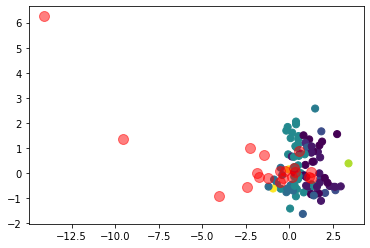

In [33]:
import matplotlib.pyplot as plt

plt.scatter(train.iloc[:100, 2], train.iloc[:100, 10], c=kmeans.predict(train.iloc[:100]), s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 10], c='red', s=100, alpha=0.5)

- 빨간 점들이 클러스터링 중심점들을 의미
- 나머지 점들은 100개의 데이터를 시각화

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
scaler.fit(train)

scaling_train = scaler.transform(train)
scaling_test = scaler.transform(test)

In [25]:
kmeans_scaling = KMeans(n_clusters=20, random_state=0).fit(scaling_train)

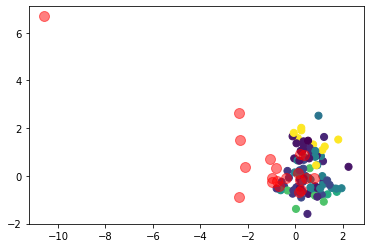

In [26]:
plt.scatter(scaling_train[:100, 2], scaling_train[:100, 10], c=kmeans_scaling.predict(scaling_train[:100]), s=50, cmap='viridis')

centers = kmeans_scaling.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 10], c='red', s=100, alpha=0.5)

- 데이터의 변수 단위를 맞추기 위해 정규화 진행
- 이상치 데이터가 포함되어 왼쪽 위에 떨어져 있는 클러스터 존재

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()
scaler.fit(train)

scaling_train = scaler.transform(train)
scaling_test = scaler.transform(test)

In [29]:
kmeans_scaling = KMeans(n_clusters=20, random_state=0).fit(scaling_train)

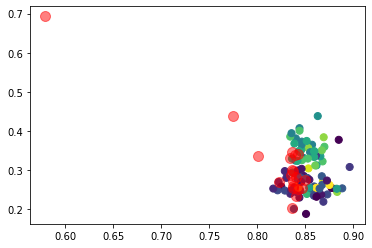

In [30]:
plt.scatter(scaling_train[:100, 2], scaling_train[:100, 10], c=kmeans_scaling.predict(scaling_train[:100]), s=50, cmap='viridis')

centers = kmeans_scaling.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 10], c='red', s=100, alpha=0.5)